<a href="https://colab.research.google.com/github/zahrae12/trash_classification/blob/main/trash_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from pathlib import Path

base_dir = Path('/drive/MyDrive/trash_dataset/train')
train_dir = base_dir / 'train'
classes = ['plastic', 'paper', 'glass', 'cardboard', 'metal']

for class_name in classes:
    (train_dir / class_name).mkdir(parents=True, exist_ok=True)

print("Folders created at /content/trash_dataset/train/")


Folders created at /content/trash_dataset/train/


In [ ]:
import shutil
from pathlib import Path


base_dir = Path('/content/drive/MyDrive/trash_dataset')
train_dir = base_dir / 'train'
classes = ['plastic', 'paper', 'glass', 'cardboard', 'metal']

for class_name in classes:
    (train_dir / class_name).mkdir(parents=True, exist_ok=True)


source_dir = Path('/content')


def get_class(filename):
    name_lower = filename.lower()
    if 'plastic' in name_lower: return 'plastic'
    if 'paper' in name_lower: return 'paper'
    if 'glass' in name_lower: return 'glass'
    if 'cardboard' in name_lower: return 'cardboard'
    if 'metal' in name_lower: return 'metal'
    return None


moved = 0
for img_path in source_dir.glob('*.jpg'):
    class_name = get_class(img_path.name)
    if class_name:
        dest_path = train_dir / class_name / img_path.name
        shutil.move(img_path, dest_path)
        moved += 1
        print(f"✓ {img_path.name} → {class_name}/")

print(f"\n🎉 Successfully organized {moved} images!")



🎉 Successfully organized 0 images!


In [ ]:
for class_name in classes:
    count = len(list((train_dir / class_name).glob('*.jpg')))
    print(f"{class_name:10}: {count} images")


plastic   : 482 images
paper     : 594 images
glass     : 501 images
cardboard : 403 images
metal     : 410 images


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split, Subset

# Define transforms
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(30),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),
        scale=(0.8, 1.2),
        shear=10
    ),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

# Load dataset WITHOUT transform first
full_dataset = datasets.ImageFolder('/content/drive/MyDrive/trash_dataset')

# Split indices
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_indices, val_indices = random_split(range(len(full_dataset)), [train_size, val_size])

# Create separate datasets with different transforms
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/trash_dataset', transform=transform_train)
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/trash_dataset', transform=transform_val)

# Create subsets using the same indices
train_ds = Subset(train_dataset, train_indices.indices)
val_ds = Subset(val_dataset, val_indices.indices)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

print(f"✅ Train: {len(train_ds)}, Val: {len(val_ds)} images")
print(f"Classes: {full_dataset.classes}")

✅ Train: 1912, Val: 478 images
Classes: ['train']


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define transforms
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(30),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.1, 0.1),
        scale=(0.8, 1.2),
        shear=10
    ),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3
    ),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

# Point to the TRAIN folder (where your actual classes are)
dataset_path = '/content/drive/MyDrive/trash_dataset/train'

# Load dataset WITHOUT transform to get indices
full_dataset = datasets.ImageFolder(dataset_path)

# Split indices
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Generate random indices
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(full_dataset))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create separate datasets with transforms
train_dataset = datasets.ImageFolder(dataset_path, transform=transform_train)
val_dataset = datasets.ImageFolder(dataset_path, transform=transform_val)

# Create subsets
train_ds = Subset(train_dataset, train_indices)
val_ds = Subset(val_dataset, val_indices)

# Create data loaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

print(f"✅ Train: {len(train_ds)}, Val: {len(val_ds)} images")
print(f"Classes: {full_dataset.classes}")
print(f"Number of classes: {len(full_dataset.classes)}")

✅ Train: 1912, Val: 478 images
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic']
Number of classes: 5


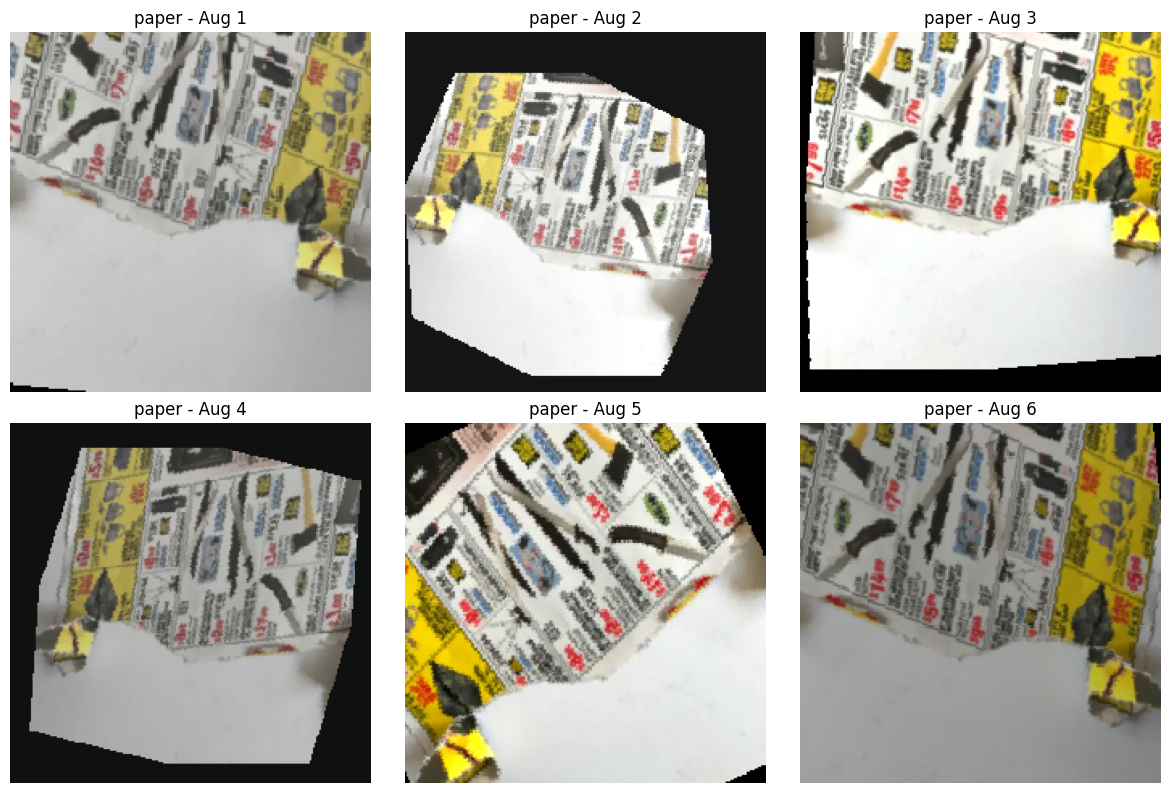

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img_tensor):
    img = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

fig = plt.figure(figsize=(12, 8))

# Test: access the same index 6 times - should show different augmentations
for i in range(6):
    img, label = train_ds[0]  # Same index [0], different augmentation each time!
    ax = fig.add_subplot(2, 3, i+1)
    imshow(img)
    ax.set_title(f"{full_dataset.classes[label]} - Aug {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using: {device}")

# Load pretrained model
model = models.resnet18(pretrained=True)

# Freeze early layers (optional but recommended for small datasets)
for param in model.parameters():
    param.requires_grad = False

# Only train the final layer initially
model.fc = nn.Linear(model.fc.in_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.fc.parameters(), lr=0.001)  # Only optimize fc layer

# Learning rate scheduler (removed verbose parameter)
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.5)

best_acc = 0.0
num_epochs = 15

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * train_correct / train_total

    # Validation phase
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * val_correct / val_total

    # Get current learning rate
    current_lr = optimizer.param_groups[0]['lr']

    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss={train_loss:.3f}, Train Acc={train_acc:.1f}% | "
          f"Val Loss={val_loss:.3f}, Val Acc={val_acc:.1f}% | "
          f"LR={current_lr:.6f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), '/content/best_trash_classifier.pth')
        print(f"✅ Best model saved! Val Acc: {val_acc:.1f}%")

    # Adjust learning rate
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_acc)
    new_lr = optimizer.param_groups[0]['lr']

    if new_lr < old_lr:
        print(f"📉 Learning rate reduced: {old_lr:.6f} → {new_lr:.6f}")

print(f"🎉 Training complete! Best validation accuracy: {best_acc:.1f}%")

Using: cuda
Epoch 1/15: Train Loss=1.312, Train Acc=46.9% | Val Loss=1.033, Val Acc=62.3% | LR=0.001000
✅ Best model saved! Val Acc: 62.3%
Epoch 2/15: Train Loss=0.908, Train Acc=68.3% | Val Loss=0.850, Val Acc=67.2% | LR=0.001000
✅ Best model saved! Val Acc: 67.2%
Epoch 3/15: Train Loss=0.801, Train Acc=71.8% | Val Loss=0.776, Val Acc=71.1% | LR=0.001000
✅ Best model saved! Val Acc: 71.1%
Epoch 4/15: Train Loss=0.738, Train Acc=72.6% | Val Loss=0.695, Val Acc=75.1% | LR=0.001000
✅ Best model saved! Val Acc: 75.1%
Epoch 5/15: Train Loss=0.673, Train Acc=75.7% | Val Loss=0.675, Val Acc=77.0% | LR=0.001000
✅ Best model saved! Val Acc: 77.0%
Epoch 6/15: Train Loss=0.650, Train Acc=76.0% | Val Loss=0.699, Val Acc=74.5% | LR=0.001000
Epoch 7/15: Train Loss=0.647, Train Acc=76.4% | Val Loss=0.642, Val Acc=74.9% | LR=0.001000
Epoch 8/15: Train Loss=0.616, Train Acc=77.8% | Val Loss=0.613, Val Acc=78.9% | LR=0.001000
✅ Best model saved! Val Acc: 78.9%
Epoch 9/15: Train Loss=0.594, Train Acc=79

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Load the best model from previous training
model.load_state_dict(torch.load('/content/best_trash_classifier.pth'))
model = model.to(device)

print("\n🔥 Fine-tuning all layers...")

# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True

# Lower learning rate for fine-tuning
optimizer = Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.5)

criterion = nn.CrossEntropyLoss()
best_acc = 0.0
num_epochs = 10  # Fine-tune for 10 more epochs

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print every 10 batches
        if batch_idx % 10 == 0:
            print(f'Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.3f}')

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * train_correct / train_total

    # Validation phase
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * val_correct / val_total

    # Get current learning rate
    current_lr = optimizer.param_groups[0]['lr']

    print(f"\nEpoch {epoch+1}/{num_epochs}: "
          f"Train Loss={train_loss:.3f}, Train Acc={train_acc:.1f}% | "
          f"Val Loss={val_loss:.3f}, Val Acc={val_acc:.1f}% | "
          f"LR={current_lr:.6f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), '/content/trash_classifier_finetuned.pth')
        print(f"✅ Best fine-tuned model saved! Val Acc: {val_acc:.1f}%")

    # Adjust learning rate
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_acc)
    new_lr = optimizer.param_groups[0]['lr']

    if new_lr < old_lr:
        print(f"📉 Learning rate reduced: {old_lr:.6f} → {new_lr:.6f}")

print(f"\n🎉 Fine-tuning complete! Best validation accuracy: {best_acc:.1f}%")


🔥 Fine-tuning all layers...
Epoch 1, Batch 0, Loss: 0.385
Epoch 1, Batch 10, Loss: 0.559
Epoch 1, Batch 20, Loss: 0.614
Epoch 1, Batch 30, Loss: 0.589
Epoch 1, Batch 40, Loss: 0.511
Epoch 1, Batch 50, Loss: 0.403

Epoch 1/10: Train Loss=0.522, Train Acc=81.2% | Val Loss=0.398, Val Acc=86.0% | LR=0.000100
✅ Best fine-tuned model saved! Val Acc: 86.0%
Epoch 2, Batch 0, Loss: 0.292
Epoch 2, Batch 10, Loss: 0.398
Epoch 2, Batch 20, Loss: 0.294
Epoch 2, Batch 30, Loss: 0.143
Epoch 2, Batch 40, Loss: 0.162
Epoch 2, Batch 50, Loss: 0.223

Epoch 2/10: Train Loss=0.334, Train Acc=87.4% | Val Loss=0.399, Val Acc=87.9% | LR=0.000100
✅ Best fine-tuned model saved! Val Acc: 87.9%
Epoch 3, Batch 0, Loss: 0.138
Epoch 3, Batch 10, Loss: 0.147
Epoch 3, Batch 20, Loss: 0.166
Epoch 3, Batch 30, Loss: 0.073
Epoch 3, Batch 40, Loss: 0.343
Epoch 3, Batch 50, Loss: 0.197

Epoch 3/10: Train Loss=0.209, Train Acc=92.5% | Val Loss=0.334, Val Acc=89.5% | LR=0.000100
✅ Best fine-tuned model saved! Val Acc: 89.5%

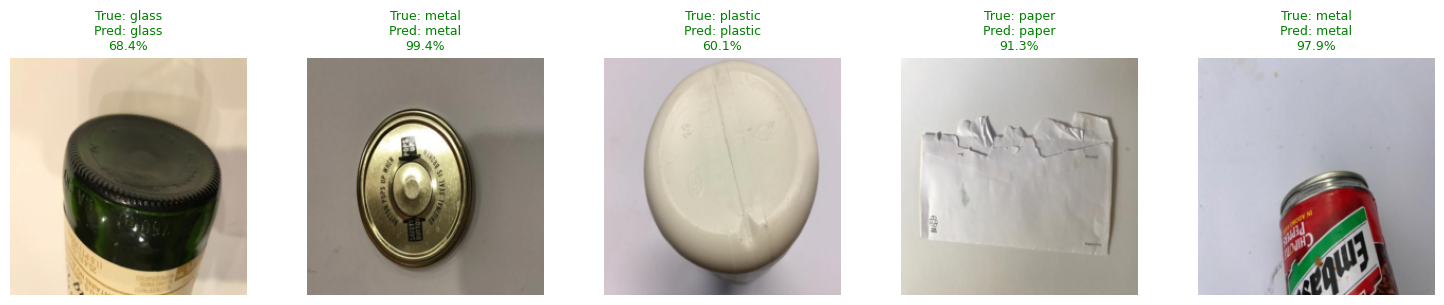

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

model.load_state_dict(torch.load('/content/best_trash_classifier.pth'))
model.eval()

# Get random validation images
random_indices = random.sample(range(len(val_ds)), 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(random_indices):
    # Get image and true label from validation set
    img_tensor, true_label = val_ds[idx]
    img_tensor = img_tensor.unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, 1)
        pred_idx = torch.argmax(probs, 1).item()
        confidence = probs[0][pred_idx].item()

    # Get class names
    true_name = full_dataset.classes[true_label]
    pred_name = full_dataset.classes[pred_idx]

    # Display (denormalize for visualization)
    img = img_tensor.cpu().squeeze().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    # Color code: green if correct, red if wrong
    color = 'green' if pred_idx == true_label else 'red'

    axes[i].imshow(img)
    axes[i].set_title(f'True: {true_name}\nPred: {pred_name}\n{confidence:.1%}',
                      fontsize=9, color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

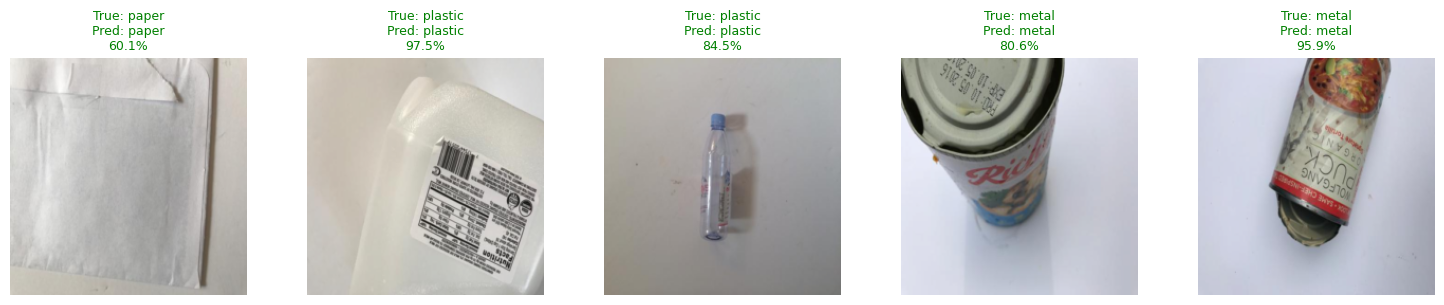

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

model.load_state_dict(torch.load('/content/best_trash_classifier.pth'))
model.eval()

# Get random validation images
random_indices = random.sample(range(len(val_ds)), 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(random_indices):
    # Get image and true label from validation set
    img_tensor, true_label = val_ds[idx]
    img_tensor = img_tensor.unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(img_tensor)
        probs = torch.softmax(output, 1)
        pred_idx = torch.argmax(probs, 1).item()
        confidence = probs[0][pred_idx].item()

    # Get class names
    true_name = full_dataset.classes[true_label]
    pred_name = full_dataset.classes[pred_idx]

    # Display (denormalize for visualization)
    img = img_tensor.cpu().squeeze().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    # Color code: green if correct, red if wrong
    color = 'green' if pred_idx == true_label else 'red'

    axes[i].imshow(img)
    axes[i].set_title(f'True: {true_name}\nPred: {pred_name}\n{confidence:.1%}',
                      fontsize=9, color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install streamlit pillow


In [ ]:
from google.colab import files

# Download your best model
files.download('/content/best_trash_classifier.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile trash_app.py
import streamlit as st
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np

@st.cache_resource
def load_model():
    device = torch.device('cpu')
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 5)

    # Local path - same folder as trash_app.py
    model.load_state_dict(torch.load('best_trash_classifier.pth', map_location=device))
    model.eval()
    return model

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

st.title("🗑️ Trash Classifier AI")
st.write("**Upload a trash photo to classify it!**")

try:
    model = load_model()
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

uploaded_file = st.file_uploader("Choose a trash photo...", type=['jpg', 'jpeg', 'png'])

if uploaded_file is not None:
    try:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption="Uploaded Image", use_column_width=True)

        img_tensor = transform(image).unsqueeze(0)

        with torch.no_grad():
            outputs = model(img_tensor)
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
            confidence = torch.max(probabilities).item()
            predicted_idx = torch.argmax(probabilities).item()
            predicted_class = classes[predicted_idx]

        st.success(f"**Prediction: {predicted_class.upper()}** ({confidence:.1%} confidence)")

        st.write("**Classification probabilities:**")
        prob_dict = {class_name: float(prob) for class_name, prob in zip(classes, probabilities)}
        st.bar_chart(prob_dict)

    except Exception as e:
        st.error(f"Error: {e}")
else:
    st.info("👆 Upload an image to get started!")

Overwriting trash_app.py


In [ ]:
files.download('trash_app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Copier votre dataset
!cp -r /content/trash_dataset /content/drive/MyDrive/

# 3. Sauvegarder modèle aussi
!cp /content/trash_classifier_v2.pth /content/drive/MyDrive/


Mounted at /content/drive
